#### Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from rutil import pystr
import pltflow.charts as flow

#### Load datasets 

In [2]:
boston = (
    pd.read_csv("../toy_datasets/boston_housing.csv")
    .loc[:,["Id","1stFlrSF","2ndFlrSF","YrSold","Neighborhood","SalePrice"]]
    .assign(
        total_sqm = lambda df: (df["1stFlrSF"] + df["2ndFlrSF"])*0.093,
        ppsqm = lambda df: df.SalePrice /   df.total_sqm 
        )
    
)
pystr(boston)

Pandas DataFrame 1460 obs. of 8 variables
$ Id                : int64        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...
$ 1stFlrSF          : int64        856, 1262, 920, 961, 1145, 796, 1694, 1107, 1022, 1077, 1040, 1182, 912, 14...
$ 2ndFlrSF          : int64        854, 0, 866, 756, 1053, 566, 0, 983, 752, 0, 0, 1142, 0, 0, 0, 0, 0, 0, 0, ...
$ YrSold            : int64        2008, 2007, 2008, 2006, 2008, 2009, 2007, 2009, 2008, 2008, 2008, 2006, 200...
$ Neighborhood      : str          "CollgCr", "Veenker", "CollgCr", "Crawfor", "NoRidge", "Mitchel", "Somerst"...
$ SalePrice         : int64        208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118...
$ total_sqm         : float64      159.03, 117.366, 166.09799999999998, 159.681, 204.414, 126.666, 157.542, 19...
$ ppsqm             : float64      1311.073382380683, 1546.4444558049179, 1345.591157027779, 876.748016357613,...


#### Plots

{'palette': ['white']}


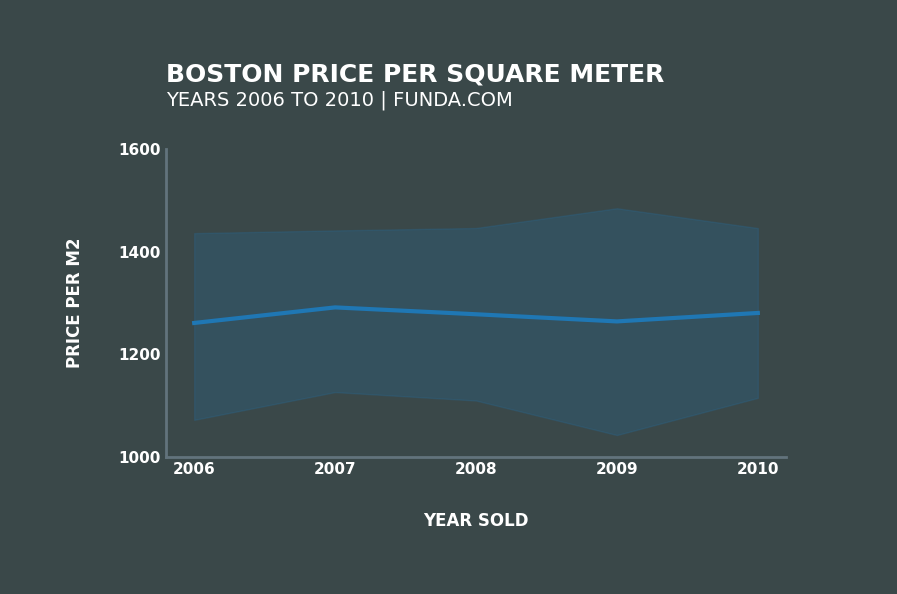

In [33]:
popular_neighborhoods = (
    boston
    .groupby('Neighborhood')
    .Id.count()
    .sort_values(ascending=False)
    .index
)[1:6]

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]    
    .groupby(["Neighborhood","YrSold"],as_index= False)
    .ppsqm.mean()
) 

(
    flow
    .line(df,"YrSold","ppsqm", style = "vox")
    .set_ylabel("PRICE PER M2")
    .set_xlabel("YEAR SOLD")
    .set_title("BOSTON PRICE PER SQUARE METER")
    .set_subtitle("YEARS 2006 TO 2010 | FUNDA.COM")
    # .color_by("Neighborhood")
    # .focus_on("CollgCr")
    .set_figsize(8,4)
    .set_yticks(np.arange(1000, 1800, 200))
    .set_xticks(np.arange(2006, 2011))
    .show()
    
)



Possible categories to .focus_on() ['CollgCr', 'Edwards', 'Gilbert', 'OldTown', 'Somerst']


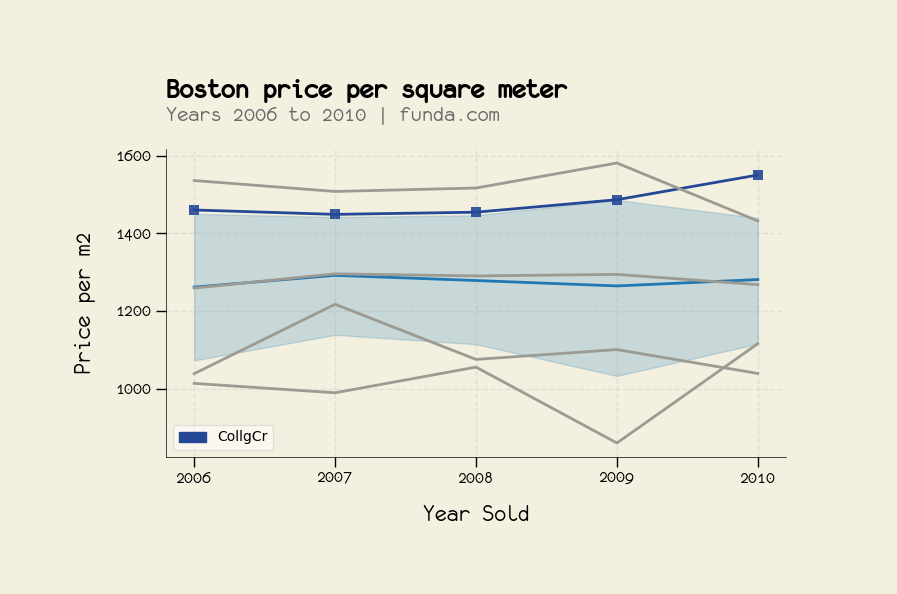

In [70]:
popular_neighborhoods = (
    boston
    .groupby('Neighborhood')
    .Id.count()
    .sort_values(ascending=False)
    .index
)[1:6]

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]    
    .groupby(["Neighborhood","YrSold"],as_index= False)
    .ppsqm.mean()
) 

(
    flow
    .line(df,"YrSold","ppsqm", style = "innocent")
    .set_ylabel("Price per m2")
    .set_xlabel("Year Sold")
    .set_title("Boston price per square meter")
    .set_subtitle("Years 2006 to 2010 | funda.com")
    .color_by("Neighborhood")
    .focus_on("CollgCr")
    .set_figsize(8,4)
    .set_yticks(np.arange(1000, 1800, 200))
    .set_xticks(np.arange(2006, 2011))
    .show()
)


In [17]:
import matplotlib.pyplot as plt
# plt.rcParamsDefault

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
flights = sns.load_dataset("flights")


In [20]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


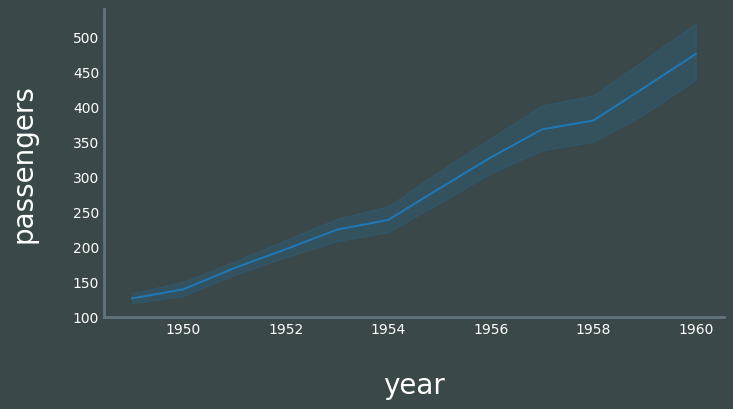

In [22]:
common_params = {
    "data": flights,
    "x": "year",
    "y": "passengers",
    "legend": False,
}
    
sns.lineplot(

    **common_params
)
plt.show()

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")